![snap](https://lever-client-logos.s3.amazonaws.com/2bd4cdf9-37f2-497f-9096-c2793296a75f-1568844229943.png)

# GetAround

In [ ]:
## je travaille sur colab avec les fichiers sur mon drive
colab = True
mypath = ''

In [ ]:
## détermination du path
if colab:
  from sys import path
  from google.colab import drive
  drive.mount('/content/drive')
  path.insert(0,'/content/drive/MyDrive/portfolio/Getaround/')
    mypath = path[0]
mypath

Mounted at /content/drive


'/content/drive/MyDrive/Getaround/'

In [ ]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

# Check-out delay

In [ ]:
df_source_csv = pd.read_csv(f"{mypath}src/get_around_pricing_project_cleaned.csv")
df_source_exc = pd.read_excel(f"{mypath}src/get_around_delay_analysis.xlsx")
display(df_source_exc.head())
print()
display(df_source_exc.describe(include="all"))
print()
print(df_source_exc.info())

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB
None


In [ ]:
df_source_exc.fillna(0)
df_source_exc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [ ]:
df_source_exc.to_csv(f"{mypath}src/getaround_delay_filled.csv",index=None)

In [ ]:
df_source_exc.corr(method='spearman')

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
rental_id,1.000000,0.066356,0.017404,0.725712,0.037636
car_id,0.066356,1.000000,0.018629,0.007052,0.018485
delay_at_checkout_in_minutes,0.017404,0.018629,1.000000,-0.007503,-0.076379
previous_ended_rental_id,0.725712,0.007052,-0.007503,1.000000,0.046900
time_delta_with_previous_rental_in_minutes,0.037636,0.018485,-0.076379,0.046900,1.000000


In [ ]:
## Dropping the id vars
df_source_exc.drop(['rental_id','car_id'],axis=1,inplace=True)

The KPI for the app

Setting the main filters

In [ ]:
## there are negative 'delay_at_checkout_in_minutes', I presume it is for those who arrive ahead of time
negative_delay = df_source_exc[df_source_exc['delay_at_checkout_in_minutes']<0]['delay_at_checkout_in_minutes']
positive_delay = df_source_exc[df_source_exc['delay_at_checkout_in_minutes']>0]['delay_at_checkout_in_minutes']
no_delay = df_source_exc[df_source_exc['delay_at_checkout_in_minutes']==0]['delay_at_checkout_in_minutes']

Count the check-outs

In [ ]:
## count the checkout
early_checkout = negative_delay.count()
print(f"ckeck-out en avance: {early_checkout}")
late_checkout = positive_delay.count()
print(f"ckeck-out en retard: {late_checkout}")
inTime_checkout = no_delay.count()
print(f"ckeck-out à l'heure: :{inTime_checkout}")
total_checkout = early_checkout+late_checkout+inTime_checkout
print(f"total ckeck-out:{total_checkout}")

ckeck-out en avance: 6820
ckeck-out en retard: 9404
ckeck-out à l'heure: :122
total ckeck-out:16346


Part Check-out

In [ ]:
## part checkout
part_early_checkout = early_checkout /total_checkout
print(f"part des ckeck-out en avance: {part_early_checkout}")
part_late_checkout = late_checkout/total_checkout
print(f"part des ckeck-out en retard: {part_late_checkout}")
part_inTime_checkout = inTime_checkout/total_checkout
print(f"part des ckeck-out à l'heure: {part_inTime_checkout}")

part des ckeck-out en avance: 0.41722745625841184
part des ckeck-out en retard: 0.5753089440841797
part des ckeck-out à l'heure: 0.00746359965740854


Sum the minutes

In [ ]:
## sum the minutes
early_minutes = negative_delay.sum()
print(f"total de minutes d'avance: {early_minutes}")
late_minutes = positive_delay.sum()
print(f"total de minutes de retard: {late_minutes}")
## always 0
inTime_minutes = no_delay.sum()
print(f"total de minutes à temps:{inTime_minutes}")
total_minutes = abs(early_minutes)+late_minutes+inTime_minutes
print(f"total ckeck-out:{total_minutes}")

total de minutes d'avance: -921766.0
total de minutes de retard: 1897647.0
total de minutes à temps:0.0
total ckeck-out:2819413.0


**Absolute** minutes Average

In [ ]:
## Absolute minutes Average
meanA_early_minutes = negative_delay.sum()/total_checkout
print(f"moyenne absolue de minutes d'avance: {meanA_early_minutes}")
meanA_late_minutes = positive_delay.sum()/total_checkout
print(f"moyenne absolue de minutes de retard: {meanA_late_minutes}")
## always 0
meanA_inTime_minutes = no_delay.sum()/total_checkout
print(f"moyenne absolue de minutes à l'heure:{meanA_inTime_minutes}")
mean_total_minutes = (early_minutes+late_minutes)/total_checkout
print(f"moyenne totale de temps : {mean_total_minutes}")

moyenne absolue de minutes d'avance: -56.39092132631836
moyenne absolue de minutes de retard: 116.0924385170684
moyenne absolue de minutes à l'heure:0.0
moyenne totale de temps : 59.70151719075003


In [ ]:
## The location price per minute
price_per_minute= round(df_source_csv['rental_price_per_day'].mean()/24/60,3)
print(f"prix par minute de location: {price_per_minute} $")

prix par minute de location: 0.084 $


**Relative** minutes Average

In [ ]:
## Relative minutes Average
meanR_early_minutes = negative_delay.sum()/early_checkout
print(f"moyenne relative de minutes d'avance: {meanR_early_minutes}")
meanR_late_minutes = positive_delay.sum()/late_checkout
print(f"moyenne relative de minutes de retard: {meanR_late_minutes}")
## always 0
meanR_InTime_minutes = no_delay.sum()/total_checkout
print(f"moyenne relative de minutes à l'heure:{meanR_InTime_minutes}")

moyenne relative de minutes d'avance: -135.15630498533724
moyenne relative de minutes de retard: 201.79147171416417
moyenne relative de minutes à l'heure:0.0


**Percentage** of time

In [ ]:
## Percentage of time
percentage_early_minutes = negative_delay.sum()/total_minutes
print(f"pourcentage de minutes d'avance: {percentage_early_minutes}")
percentage_late_minutes = positive_delay.sum()/total_minutes
print(f"pourcentage de minutes de retard: {percentage_late_minutes}")
## always 0
percentage_inTime_minutes = no_delay.sum()/total_minutes
print(f"pourcentage de minutes à temps:{percentage_inTime_minutes}")

pourcentage de minutes d'avance: -0.3269354294670557
pourcentage de minutes de retard: 0.6730645705329442
pourcentage de minutes à temps:0.0


Numbers about the checkin type

In [ ]:
## Numbers about the checkin typ
delay_checkin_type = df_source_exc[df_source_exc['delay_at_checkout_in_minutes']>0]['checkin_type']
nb_checkin_type=df_source_exc['checkin_type']

In [ ]:
print(f"count checkin type: {nb_checkin_type.value_counts()}")
print()
print(f"count delay in checkin type: {delay_checkin_type.value_counts()}")

count checkin type: mobile     17003
connect     4307
Name: checkin_type, dtype: int64

count delay in checkin type: mobile     7945
connect    1459
Name: checkin_type, dtype: int64


Text(0.5, 1.0, 'count checkin type')

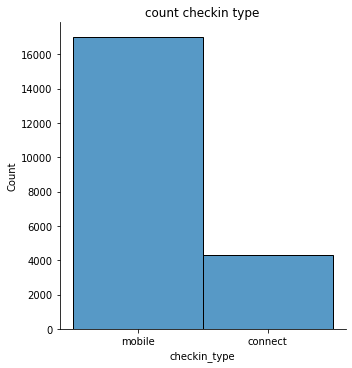

In [ ]:
sns.displot(nb_checkin_type)
plt.title('count checkin type')

Text(0.5, 1.0, 'count delayed checkin type')

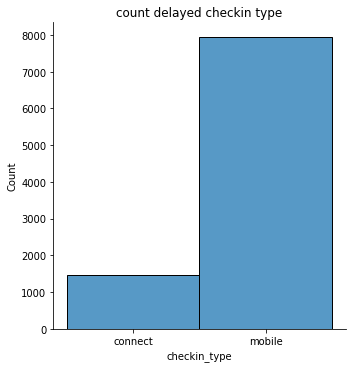

In [ ]:
sns.displot(delay_checkin_type)
plt.title('count delayed checkin type')

In [ ]:
print(f"{nb_checkin_type.value_counts().index[1]} represent {100*nb_checkin_type.value_counts()[1]/nb_checkin_type.value_counts()[0]} % of {nb_checkin_type.value_counts().index[0]}: ")
print()
print(f"in case of delay, {nb_checkin_type.value_counts().index[1]} represent only {100*delay_checkin_type.value_counts()[1]/delay_checkin_type.value_counts()[0]} % of {delay_checkin_type.value_counts().index[0]}: ")

connect represent 25.330823972240193 % of mobile: 

in case of delay, connect represent only 18.363750786658276 % of mobile: 


OUR THRESHOLD IS THE MEAN DELAY PER LOCATION: 59.70151

In [ ]:
## The revenue affected by the delay is:
mean_cost_of_delay = round(price_per_minute*mean_total_minutes,3)
print(f"average loss :{mean_cost_of_delay} $")

average loss :5.015 $


In [ ]:
## the drivers delay
print(f"in {round(100*part_late_checkout,2)} cases, drivers are late")

in 57.53 cases, drivers are late


In [ ]:
## function to calculate the nb of drivers late at checkout over the threshold given
def func_nb_drivers_late(thresh):
    if thresh <=0:
        thresh = 0
    return df_source_exc[df_source_exc['delay_at_checkout_in_minutes']>thresh]['delay_at_checkout_in_minutes'].count()

In [ ]:
## function to calculate the cost of the drivers late at checkout over the threshold given
def func_cost_thresh(thresh):
    cost = round(func_nb_drivers_late(thresh)*price_per_minute*mean_total_minutes,2)
    return cost

In [ ]:
func_nb_drivers_late(-mean_total_minutes)

9404

In [ ]:
func_cost_thresh(-mean_total_minutes)

66507.97

In [ ]:
mean_total_minutes

59.70151719075003

In [ ]:
part_late_checkout

0.5753089440841797

In [ ]:
total_checkout

16346